In [1]:
import pandas as pd
import requests
import numpy as np 
import matplotlib.pyplot as plt
from py2neo import Graph, Node,Relationship,NodeMatcher
import re


In [63]:
resp = requests.get('http://www.omdbapi.com/?i=tt0106856&apikey=ad93b370')  #3501632   3896198   tt0117737  
resp = resp.json()
if 'Title' in resp.keys():
    print(resp)
else:
    print("mal")
#tt0109830
#toy 0114709

{'Title': 'Falling Down', 'Year': '1993', 'Rated': 'R', 'Released': '26 Feb 1993', 'Runtime': '113 min', 'Genre': 'Crime, Drama, Thriller', 'Director': 'Joel Schumacher', 'Writer': 'Ebbe Roe Smith', 'Actors': 'Michael Douglas, Robert Duvall, Barbara Hershey, Rachel Ticotin', 'Plot': 'An unemployed defense worker frustrated with the various flaws he sees in society begins to psychotically and violently lash out against them.', 'Language': 'English, Spanish, Korean', 'Country': 'France, USA, UK', 'Awards': '1 win & 2 nominations.', 'Poster': 'https://m.media-amazon.com/images/M/MV5BYjcxMzM3OWMtNmM3Yy00YzBkLTkxMmQtMDk4MmM3Y2Y4MDliL2ltYWdlXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.6/10'}, {'Source': 'Rotten Tomatoes', 'Value': '74%'}, {'Source': 'Metacritic', 'Value': '56/100'}], 'Metascore': '56', 'imdbRating': '7.6', 'imdbVotes': '163,694', 'imdbID': 'tt0106856', 'Type': 'movie', 'DVD': 'N/A', 'BoxOffice': 'N/A', 'Production

In [25]:
re.sub(r'\'',"", resp['Title'])

'Weekend at Bernies'

In [29]:
_texto(list( resp['Title']))

'WeekendatBernies'

In [4]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

In [5]:
from py2neo import Graph, Node,Relationship,NodeMatcher
graph = Graph("bolt://localhost:7687", auth=("neo4j", "uniandes"))

In [390]:
#existe nodo
#rom py2neo import Graph, NodeMatcher
ac = graph.run("MATCH (n:Persona:Estcritor) WHERE n.nombre = 'Tom Hanks' RETURN n").to_table()
len(ac)

0

In [288]:
#crear nodo
jonh = Node("Doctor","Person", name="Jonh juan", age = 21)
graph.create(jonh)

In [434]:
#crear relacion vuelve a crear el nodo
rela = Relationship(Node("Doctor",name ="Jonh juan"),"CONOCE",Node("Persona:Actor", nombre ="Tom Hanks"))
graph.create(rela)

In [507]:
for item in resp:
    print(item," -- " ,resp[item])

Title  --  Forrest Gump
Year  --  1994
Rated  --  PG-13
Released  --  06 Jul 1994
Runtime  --  142 min
Genre  --  Drama, Romance
Director  --  Robert Zemeckis
Writer  --  Winston Groom (novel), Eric Roth (screenplay)
Actors  --  Tom Hanks, Rebecca Williams, Sally Field, Michael Conner Humphreys
Plot  --  The presidencies of Kennedy and Johnson, the events of Vietnam, Watergate and other historical events unfold through the perspective of an Alabama man with an IQ of 75, whose only desire is to be reunited with his childhood sweetheart.
Language  --  English
Country  --  USA
Awards  --  Won 6 Oscars. Another 44 wins & 74 nominations.
Poster  --  https://m.media-amazon.com/images/M/MV5BNWIwODRlZTUtY2U3ZS00Yzg1LWJhNzYtMmZiYmEyNmU1NjMzXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg
Ratings  --  [{'Source': 'Internet Movie Database', 'Value': '8.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '70%'}, {'Source': 'Metacritic', 'Value': '82/100'}]
Metascore  --  82
imdbRating  --  8.8
imdbVotes  -- 

In [208]:
a = resp['Writer']
a

'Eric Pearson, Craig Kyle, Christopher L. Yost, Stan Lee (based on the Marvel comics by), Larry Lieber (based on the Marvel comics by), Jack Kirby (based on the Marvel comics by)'

In [227]:
#expresion  regular para cojer datos entre parentisis
a1 = a.split(",")
a1 =["(hhhh)  nanan", 'babab (uu)']
#a1
for v in a1:
    v =re.search(r'\((.*?)\)', v).group(1)
    
    '''
    ini = v.find("(")
    fin = v.find(")")
    v = v[ini:fin]
    v =v[0:ini] 
    '''
    print(v)

hhhh
uu


In [230]:
#expresion regular para excluir datso en parentesis
a1 = a.split(",")
a1 =["(hhhh)  nanan", 'babab (uu)']
#a1
for v in a1:
    v =re.sub(r'\((.*?)\)',"", v)
    print(v)
    
  

  nanan
babab 


In [229]:
a = resp['Writer']
v =re.sub(r'\((.*?)\)',"", a)
v

'Eric Pearson, Craig Kyle, Christopher L. Yost, Stan Lee , Larry Lieber , Jack Kirby '

In [26]:
def _texto(X):
    if type(X)==list:
        X = pd.Series(X)
    puntuacion = "' '\!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    X = X.apply(lambda x: [w for w in x if w not in  puntuacion])
    X = X.apply(lambda x: " ".join(x))
    return X.str.cat()
    

In [32]:
def _texto_(X):
    if type(X)==list:
        X = pd.Series(X)
    puntuacion = "''\!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    X = X.apply(lambda x: [w for w in x if w not in  puntuacion])
    X = X.apply(lambda x: " ".join(x))
    return X.str.cat()
    

In [31]:
_texto_(list(resp['Title']))

'Weekend at Bernies'

In [231]:
def nodo_neo_persona(lista,rol):
    personas = lista.split(",")
    crear_a =""
    lista_nodo_ids=[]
    for a in personas:
        a = a.strip()
        a1 = _texto(list(a))
        lista_nodo_ids.append(a1)
        crear_a = crear_a + "CREATE (" + a1 + ":Persona:" + rol + " {nombre:'" + a + "' })" + "\n"
    return crear_a, lista_nodo_ids
    

In [238]:
def nodo_neo_genero(lista):
    genero = lista.split(",")
    crear_a =""
    lista_nodo_ids=[]
    for a in genero:
        a = a.strip()
        a1 = _texto(list(a))
        lista_nodo_ids.append(a1)
        crear_a = crear_a + "CREATE (" + a1 + ":Genero {nombre:'" + a + "' })" + "\n"
    return crear_a, lista_nodo_ids

In [232]:
def nodo_neo_relacion(lista, nodo, relacion):
    crear_a ="CREATE \n"
    for a in lista:
        crear_a = crear_a +  "(" + a + ")-[:" + relacion +  "]->(" + nodo  +"),\n"
    return (crear_a[:-2] +"\n")

In [243]:
def nodo_neo_relacion_genero( lista,nodo):
    crear_a ="CREATE \n"
    for a in lista:
        crear_a = crear_a +  "(" + nodo + ")-[:ES_GENERO]->(" + a  + "),\n"
    return (crear_a[:-2] +"\n")

In [161]:
a =_texto(list(resp['Title']))
print(a)

ThorRagnarok


In [93]:
resp['Title'].replace(" ","")

'Thor:Ragnarok'

In [122]:
actores = resp['Actors'].split(",")
actores

['Chris Hemsworth', ' Tom Hiddleston', ' Cate Blanchett', ' Idris Elba']

In [246]:
f = open("jsonFile.txt", "w")
generos =[]
pelicula = _texto(list(resp['Title']))
crear_p = "MATCH (n) DETACH DELETE n; \n"

crear_p = crear_p + "DROP CONSTRAINT ON (n:Pelicula) ASSERT n.titulo IS UNIQUE;\n"
crear_p = crear_p + "DROP CONSTRAINT ON (n:Persona) ASSERT n.nombre IS UNIQUE;\n"
    
crear_p = crear_p + "CREATE CONSTRAINT ON (n:Pelicula) ASSERT n.titulo IS UNIQUE;\n"
crear_p = crear_p + "CREATE CONSTRAINT ON (n:Persona) ASSERT n.nombre IS UNIQUE;\n"
    
lista_ids_actors =set()
crear_p = crear_p +"CREATE (" + pelicula + ":Pelicula {titulo: '" + resp['Title'] + "' , lanzamiento:" +resp['Year'] + ", rating:" + resp['imdbRating'] + "})\n"
f.write(crear_p)

crear, lista_ids_actors = nodo_neo_persona(resp['Actors'],"Actor")
f.write(crear)

crear,lista_ids_directors = nodo_neo_persona(resp['Director'],"Director")
f.write(crear)

#writers
w =re.sub(r'\((.*?)\)',"", resp['Writer'])
crear,lista_ids_escritores = nodo_neo_persona(w,"Escritor")
f.write(crear)

#Genre

crear,lista_ids_genero = nodo_neo_genero(resp['Genre'])
f.write(crear)


f.write(nodo_neo_relacion(lista_ids_actors, pelicula, "ACTUO_EN"))
f.write(nodo_neo_relacion(lista_ids_directors, pelicula, "DIRIGIO"))
f.write(nodo_neo_relacion(lista_ids_escritores, pelicula, "ESCRIBIO"))
f.write(nodo_neo_relacion_genero(lista_ids_genero,pelicula))

f.close()
#print(lista_ids_actors)
#print(lista_ids_directos)

In [ ]:
h =[1,2,3,4,56]
j =[ 3,4]
if j in h:
    prin

In [41]:
def existe_nodo(labels, propiedad, nombre):
    ac = graph.run("MATCH (n:" + labels + ") WHERE n." + propiedad + "= '" +nombre + "'  RETURN n").to_table()
    if len(ac) > 0:
        return True
    else:
        return False

In [42]:
def existe_relacion(pelicula, relacion,labels, propiedad,nombre):
    #graph.run("MATCH (Pelicula { titulo: 'Toy Story' })<-[:ACTUO_EN]-(Persona:Actor{nombre:'Tom Hanks'}) RETURN Persona.nombre").to_table()
    ac =graph.run("MATCH (Pelicula { titulo:'" + pelicula + "' })<-[:" + relacion +"]->(" + labels
                  + "{" + propiedad + ":'" + nombre + "' }) RETURN Pelicula.titulo").to_table()
    if len(ac) > 0:
        return True
    else:
        return False

In [43]:
def crear_relacion(pelicula,relacion,labels,nombre):
    if labels =="Genero":
        crear_rel = "MATCH (a:" + labels + "), (b:Pelicula) WHERE a.nombre ='" + nombre + "' AND b.titulo ='" + pelicula + "' CREATE (a) <-[:" + relacion + "]-(b) RETURN b.titulo"
    else:
        crear_rel = "MATCH (a:" + labels + "), (b:Pelicula) WHERE a.nombre ='" + nombre + "' AND b.titulo ='" + pelicula + "' CREATE (a) -[:" + relacion + "]->(b) RETURN b.titulo"
   
    graph.run(crear_rel)
    #return crear_rel

   

In [497]:
crear_relacion("toy","ACTUO_EN","Persona:Actor","Jhon")

In [447]:
#graph = Graph("bolt://localhost:7687", auth=("neo4j", "uniandes"))

pelicula_nodo =""
if not existe_nodo("Pelicula", "titulo" , resp['Title']):
    print("SI")
    pelicula_nodo = Node("Pelicula", titulo = resp['Title'] , lanzamiento=resp['Year'], rating = resp['imdbRating'])
    graph.create(pelicula_nodo)
    
    personas = resp['Actors'].split(",")
    for act in personas:
        act = act.strip()
        print(act)
        if not existe_nodo("Persona:Actor","nombre",act):
            actor_nodo = Node("Persona", "Actor", nombre = act)
            graph.create(actor_nodo)
        #existe_relacion("Toy Story","ES_GENERO", "Genero","nombre", "Animation")
        if not existe_relacion(resp['Title'], "ACTUO_EN", "Persona:Actor", "nombre", act):
            crear_relacion(resp['Title'],"ACTUO_EN","Persona:Actor",act)
    
    personas = resp['Director'].split(",")
    
                     
print("ok")


SI
Tom Hanks
Tim Allen
Don Rickles
Jim Varney
ok


In [13]:
#nevau versio
#graph = Graph("bolt://localhost:7687", auth=("neo4j", "uniandes"))
peliculas = ["0109830", "0114709"]
for peli in peliculas:
    url ="http://www.omdbapi.com/?i=tt" + peli +  "&apikey=ad93b370"
    resp = requests.get(url)  #3501632   3896198   tt0117737  
    resp = resp.json()

    pelicula_nodo =""
    if not existe_nodo("Pelicula", "titulo" , resp['Title']):
        print("SI")
        #Pelicula
        pelicula_nodo = Node("Pelicula", titulo = resp['Title'] , lanzamiento=resp['Year'], rating = resp['imdbRating'])
        graph.create(pelicula_nodo)

        #Actores
        personas = resp['Actors'].split(",")
        crear_nodos_(personas,"Persona:Actor","nombre", "ACTUO_EN")

        #Directores
        personas = resp['Director'].split(",")
        crear_nodos_(personas,"Persona:Director","nombre", "DIRIGIO")

        #writers
        personas = re.sub(r'\((.*?)\)',"", resp['Writer'])
        personas = personas.split(",")
        crear_nodos_(personas,"Persona:Escritor","nombre", "ESCRIBIO")

        #Genero
        personas = resp['Genre'].split(",")
        crear_nodos_(personas,"Genero","nombre", "ES_GENERO")

print("ok")


NameError: name 'existe_nodo' is not defined

In [58]:
def crear_nodos_(personas, labels, propiedad, relacion, titulo):
    for act in personas:
        act = act.strip()
        act = _texto_(list(act))
        #print(act)
        if not existe_nodo(labels,propiedad,act):
            labe = list(labels.split(":"))
            if len(labe) == 2:
                actor_nodo = Node("Persona",labe[1] , nombre = act)
            else:
                actor_nodo = Node(labe[0] , nombre = act)
            graph.create(actor_nodo)
        #existe_relacion("Toy Story","ES_GENERO", "Genero","nombre", "Animation")
        #if not existe_relacion(resp['Title'], relacion, labels, propiedad, act):
            #crear_relacion(resp['Title'],relacion,labels,act)
            
        if not existe_relacion(titulo, relacion, labels, propiedad, act):
            crear_relacion(titulo,relacion,labels,act)
            

In [484]:
#len(list("Genero".split(":")))
list("Generohhh".split(":"))[0]

'Generohhh'

In [485]:
lab ="Persona, Actor"
actor_nodo = Node(list("Generohhh".split(":"))[0], nombre = "taddul")
graph.create(actor_nodo)

In [386]:
#ac = graph.run("MATCH (n:Pelicula) WHERE n.titulo = 'Toy Story' RETURN n").to_table()
#len(ac)
exite_nodo("Pelicula", "titulo", "ggag") #resp['Title'])

False

In [398]:
MATCH (Pelicula { titulo: 'Toy Story' })<-[:ACTUO_EN]-(Persona:Actor{nombre:'Tom Hanks'}) RETURN Persona.nombre
MATCH (Persona:Actor{nombre:'Tom Hanks'})<-[:ACTUO_EN]->(Pelicula { titulo: 'Toy Story' }) RETURN Persona.nombre
MATCH (Pelicula { titulo: 'Toy Story' })<-[:ES_GENERO]->(Genero{nombre:'Animation'}) RETURN Pelicula.titulo

In [406]:
#MATCH (Pelicula{titulo:'Toy Story'})
#RETURN Pelicula.titulo
graph.run("MATCH (Pelicula{titulo:'Toy Story'}) RETURN Pelicula.titulo").to_table()

Pelicula.titulo
Toy Story


In [405]:
graph.run("MATCH (Pelicula { titulo: 'Toy Story' })<-[:ACTUO_EN]-(Persona:Actor{nombre:'Tom Hanks'}) RETURN Persona.nombre").to_table()

Persona.nombre
Tom Hanks


In [407]:
graph.run("MATCH (Pelicula { titulo: 'Toy Story' })<-[:ACTUO_EN]-(Persona:Actor{nombre:'Tom Hanks'}) RETURN Pelicula.titulo").to_table()

Pelicula.titulo
Toy Story


In [425]:
#existe_relacion("Toy Story","ACTUO_EN", "Persona:Actor","nombre", "Tom Hanks")
existe_relacion("Toy Story","ES_GENERO", "Genero","nombre", "Animation")

True

In [ ]:
#crea nuevos nodos
CREATE (TomHanks)-[:ACTUO_EN]->(ToyStory)
"CREATE (Persona:Actor{nombre:'Tom Hanks22'}) -[:ACTUO_EN]-> (Pelicula { titulo: 'Toy Story' }) RETURN Persona.nombre"

In [436]:
#sin creea nuevos nodos
MATCH (a),(b) WHERE id(a) =1 and id(b) = 2 create (a)-[r:KKNOWS]->(b) RETURN a, b

MATCH (a:Persona), (b:Pelicula)   
WHERE a.nombre = "Tom Hanks" AND b.titulo = "Toy Story"   
CREATE (a)-[:ACTUO_EN]->(b)   
RETURN a,b   

In [ ]:
MATCH (a:Genero), (b:Pelicula)   
WHERE a.nombre = "Tom Hanks" AND b.titulo = "Toy Story"   
CREATE (a)-[:ACTUO_EN]->(b)   
RETURN a,b   

MATCH (a:Persona:Actor), (b:Pelicula) WHERE a.nombre ='Jhon' AND b.titulo ='toy' CREATE (a) -[:ACTUO_EN]->(b) RETURN b.titulo

# Lectura archivos

In [6]:
links = pd.read_csv('links.csv', dtype ={'imdbId':str}) 
ratings =pd.read_csv("ratings.csv")

In [5]:
links.head()

,movieId,imdbId,tmdbId
0,1,0114709,862.0
1,2,0113497,8844.0
2,3,0113228,15602.0
3,4,0114885,31357.0
4,5,0113041,11862.0


In [6]:
links.shape

(58098, 3)

In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [8]:
ratings.shape

(27753444, 4)

In [77]:
missing_values_table(ratings)

,Missing Values,% of Total Values
userId,0,0.0
movieId,0,0.0
rating,0,0.0
timestamp,0,0.0


In [78]:
missing_values_table(links)

,Missing Values,% of Total Values
movieId,0,0.000000
imdbId,0,0.000000
tmdbId,181,0.311543


In [8]:
links[links.duplicated()]

,movieId,imdbId,tmdbId


In [83]:
ratings[ratings.duplicated()]

,userId,movieId,rating,timestamp


In [49]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.775344e+07,2.775344e+07,2.775344e+07,2.775344e+07
mean,1.419420e+05,1.848800e+04,3.530445e+00,1.193122e+09
std,8.170740e+04,3.510263e+04,1.066353e+00,2.160482e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,7.117600e+04,1.097000e+03,3.000000e+00,9.986053e+08
50%,1.420220e+05,2.716000e+03,3.500000e+00,1.174256e+09
75%,2.124590e+05,7.150000e+03,4.000000e+00,1.422744e+09
max,2.832280e+05,1.938860e+05,5.000000e+00,1.537945e+09


In [9]:
np.sort(ratings.rating.unique())

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

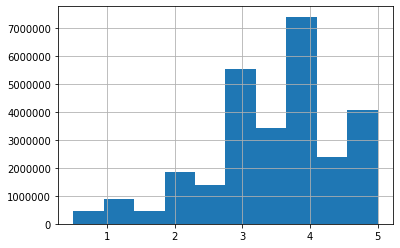

In [11]:
ratings.rating.hist()
plt.show()

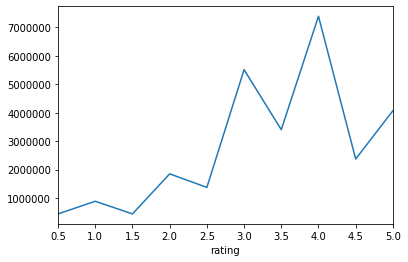

In [46]:
re = ratings.groupby('rating')['userId'].count()
re.plot()

In [47]:
re

rating
0.5     442388
1.0     886233
1.5     441354
2.0    1850627
2.5    1373419
3.0    5515668
3.5    3404360
4.0    7394710
4.5    2373550
5.0    4071135
Name: userId, dtype: int64

In [43]:
re.describe()

count    1.000000e+01
mean     2.775344e+06
std      2.318130e+06
min      4.413540e+05
25%      1.008030e+06
50%      2.112088e+06
75%      3.904441e+06
max      7.394710e+06
Name: userId, dtype: float64

In [42]:
re.groupby(level=0).apply(lambda x: 100 * x / float(re.sum())).sort_values()

rating
1.5     1.590267
0.5     1.593993
1.0     3.193236
2.5     4.948643
2.0     6.668099
4.5     8.552272
3.5    12.266442
5.0    14.668936
3.0    19.873815
4.0    26.644297
Name: userId, dtype: float64

In [56]:
re =ratings.groupby('userId')['rating'].count()
re.shape

(283228,)

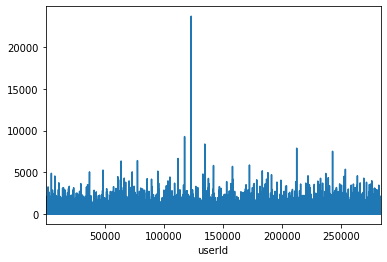

In [64]:
re =ratings.groupby('userId')['rating'].count()
re.plot()

In [67]:
re.describe()

count    283228.000000
mean         97.989761
std         212.760722
min           1.000000
25%          15.000000
50%          30.000000
75%          95.000000
max       23715.000000
Name: rating, dtype: float64

In [71]:
re[re ==1].count()

5620

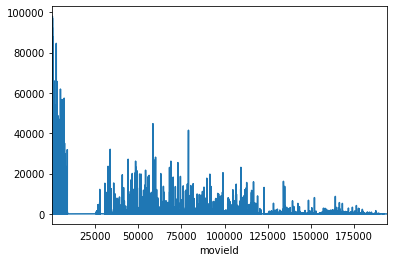

In [73]:
re =ratings.groupby('movieId')['rating'].count()
re.plot()

In [75]:
len(re)

53889

In [74]:
re.describe()

count    53889.000000
mean       515.011301
std       2934.758939
min          1.000000
25%          2.000000
50%          7.000000
75%         48.000000
max      97999.000000
Name: rating, dtype: float64

In [89]:
links.movieId[~links.movieId.isin(ratings.movieId)].count()

4209

## El data set tiene 58.098 películas y 27.753.444 de ratings sobre estas películas El mayor número de evaluación es 4 con el 26.6% de las evaluaciones en el set de datos, el promedio de evaluación está en 3.5  y el 62% de los usuarios evaluaron por encima de 3.5. 

## En total hay 283.228 Usuarios, el usuario (ID:123100) que más votaciones tiene con 23.715 votaciones y  5.620 usuarios tienen una sola votación, el promedio de votaciones es de 98

## Se utiliza como identificado de la película el imdbId, dado que hay 181 películas sin ID tmdbId.

## Hay 4.209 Películas que no tienen evaluación. Con las cuales se debe tener una forma especial para ser recomendadas y podrían ser candidatas a ser serendipia.


In [102]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [103]:
links.head()

,movieId,imdbId,tmdbId
0,1,0114709,862.0
1,2,0113497,8844.0
2,3,0113228,15602.0
3,4,0114885,31357.0
4,5,0113041,11862.0


In [7]:
links.dtypes

movieId      int64
imdbId      object
tmdbId     float64
dtype: object

In [23]:
links[links.imdbId== '0114319']

,movieId,imdbId,tmdbId
6,7,0114319,11860.0


In [11]:
#ratings.merge(links, how ='left', on=['movieId','movieId'])
#pd.merge(ratings,links, how ='left', on=['movieId','movieId'])

In [8]:
ratings =ratings[['userId', 'movieId' ,'rating']].merge(links[['movieId','imdbId']], how ='left', on=['movieId','movieId'])

In [9]:
ratings.head()

,userId,movieId,rating,imdbId
0,1,307,3.5,0108394
1,1,481,3.5,0107302
2,1,1091,1.5,0098627
3,1,1257,4.5,0088794
4,1,1449,4.5,0118111


In [10]:
ratings = ratings.sort_values(by ='userId')

In [15]:
ratings.shape

(27753444, 4)

In [52]:
ratings['imdbId'].value_counts().nlargest(n=1)

111161    97999
Name: imdbId, dtype: int64

In [45]:
def crear_nodo_pelicula(resp,titulo_peli):
                #print("SI")
            #Pelicula
            #titulo_peli = _texto_(list(resp['Title']))
            pelicula_nodo = Node("Pelicula", titulo = titulo_peli , lanzamiento=resp['Year'], rating = resp['imdbRating'])
            graph.create(pelicula_nodo)

            #Actores
            personas = resp['Actors'].split(",")
            crear_nodos_(personas,"Persona:Actor","nombre", "ACTUO_EN",titulo_peli)

            #Directores
            personas = resp['Director'].split(",")
            #print("CREA DIRECTOREs ", personas)
            crear_nodos_(personas,"Persona:Director","nombre", "DIRIGIO",titulo_peli)

            #writers
            personas = re.sub(r'\((.*?)\)',"", resp['Writer'])
            personas = personas.split(",")
            crear_nodos_(personas,"Persona:Escritor","nombre", "ESCRIBIO", titulo_peli)

            #Genero
            personas = resp['Genre'].split(",")
            crear_nodos_(personas,"Genero","nombre", "ES_GENERO",titulo_peli)



In [59]:
def crear_nodo_user(userid,rating,resp, titulo_peli):
    if not existe_nodo("Pelicula", "titulo" , titulo_peli):
        crear_nodo_pelicula(resp,titulo_peli)
    userid =[str(userid)]
    #userid = list(userid)        
    
    crear_nodos_(userid, "Persona:Usuario","nombre","EVALUO",titulo_peli)
    
    #if not existe_nodo("Persona:Usuario", "nombre",userid):
        #userid = list(userid)
     
        
    
    
    

In [60]:
def crear_graph_movie(datos):
    global graph 
    graph = Graph("bolt://localhost:7687", auth=("neo4j", "uniandes"))
    not_links = []
    for index,item in datos.iterrows():
        
        userid = int(item['userId'])
        #movieid = int(item['movieId'])
        id_movie = str(item['imdbId'])
        rating = item['rating']
        
        url ="http://www.omdbapi.com/?i=tt" + id_movie +  "&apikey=ad93b370"
        resp = requests.get(url)  
        resp = resp.json()
        if 'Title' in resp.keys():
           
            
            print("Pelicula " , id_movie)
            #print("titulo...",url )

            #pelicula_nodo =""
            titulo_peli = _texto_(list(resp['Title']))
            if not existe_nodo("Pelicula", "titulo" , titulo_peli):
                crear_nodo_pelicula(resp,titulo_peli)
            
            crear_nodo_user(userid,rating,resp,titulo_peli)
        else:
            not_links.append(id_movie)
            
    return not_links

In [49]:
rating_  = ratings[:10]
rating_.set_value(12,'imdbId',999)
#0098627
rating_.set_value(8,'imdbId','0098627')
rating_

C:\Users\rsantacruz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\rsantacruz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,userId,movieId,rating,imdbId
0,1,307,3.5,0108394
15,1,3893,3.5,0171580
14,1,3826,2.0,0164052
13,1,3698,3.5,0093894
12,1,3424,4.5,999
10,1,2986,2.5,0100502
9,1,2840,3.0,0145531
8,1,2478,4.0,0098627
11,1,3020,4.0,0106856
6,1,1591,1.5,0120177


In [75]:
_rating_ = rating_[rating_ == '0108394']

C:\Users\rsantacruz\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [72]:
resp = requests.get('http://www.omdbapi.com/?i=tt0108394&apikey=ad93b370')  #3501632   3896198   tt0117737  
resp = resp.json()
resp

{'Title': 'Three Colors: Blue',
 'Year': '1993',
 'Rated': 'R',
 'Released': '08 Sep 1993',
 'Runtime': '94 min',
 'Genre': 'Drama, Music, Mystery, Romance',
 'Director': 'Krzysztof Kieslowski',
 'Writer': 'Krzysztof Kieslowski (scenario), Krzysztof Piesiewicz (scenario), Agnieszka Holland (scenario collaborator), Edward Zebrowski (scenario collaborator), Slawomir Idziak (scenario collaborator)',
 'Actors': 'Juliette Binoche, Benoît Régent, Florence Pernel, Charlotte Véry',
 'Plot': 'A woman struggles to find a way to live her life after the death of her husband and child.',
 'Language': 'French, Romanian, Polish',
 'Country': 'France, Poland, Switzerland',
 'Awards': 'Nominated for 3 Golden Globes. Another 21 wins & 14 nominations.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BZGJhNDdmMWMtNzZiYy00MmFiLThjNmUtYTE1ZjRkNjdjYmQ5XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.9/10'},
  {'Source': 'Rotten Tomatoes', 'Value'

In [ ]:
notlinks

In [ ]:
notlinks = crear_graph_movie(ratings)
print("Termina...", len(notlinks))

Pelicula  0108394
Pelicula  0171580
Pelicula  0164052
Pelicula  0093894
Pelicula  0100502
Pelicula  0145531
Pelicula  0098627
Pelicula  0106856
Pelicula  0120177
Pelicula  0119081
Pelicula  0118111
Pelicula  0088794
Pelicula  0098627
Pelicula  0107302
Pelicula  0090305
Pelicula  0092699
Pelicula  0069704
Pelicula  0086200
Pelicula  0091419
Pelicula  0137363
Pelicula  0085244
Pelicula  0102250
Pelicula  0116225
Pelicula  0083131
Pelicula  0091867
Pelicula  0079522
Pelicula  0067185
Pelicula  0098724
Pelicula  0113243
Pelicula  0097239
Pelicula  0095271
Pelicula  0053226
Pelicula  0120815
Pelicula  0102757
Pelicula  0119905
Pelicula  0116095
Pelicula  0082010
Pelicula  0071562
Pelicula  0038300
Pelicula  0115472
Pelicula  0118971
Pelicula  0207201
Pelicula  0181536
Pelicula  0162222
Pelicula  0212346
Pelicula  0181865
Pelicula  0218817
Pelicula  0092644
Pelicula  0086960
Pelicula  0092974
Pelicula  0179626
Pelicula  0212985
Pelicula  0100232
Pelicula  0088000
Pelicula  0215750
Pelicula  

Pelicula  0117509
Pelicula  0095159
Pelicula  0079470
Pelicula  0092890
Pelicula  0105236
Pelicula  0091763
Pelicula  0098627
Pelicula  0103772
Pelicula  0104036
Pelicula  0099371
Pelicula  0092099
Pelicula  0101775
Pelicula  0096754
Pelicula  0071853
Pelicula  0080684
Pelicula  0082971
Pelicula  0090605
Pelicula  0050083
Pelicula  0056592
Pelicula  0116409
Pelicula  0131325
Pelicula  0116908
Pelicula  0095016
Pelicula  0116629
Pelicula  0115798
Pelicula  0116778
Pelicula  0116213
Pelicula  0117218
Pelicula  0116040
Pelicula  0117913
Pelicula  0118073
Pelicula  0117438
Pelicula  0115857
Pelicula  0117918
Pelicula  0068646
Pelicula  0110693
Pelicula  0120004
Pelicula  0032138
Pelicula  0062622
Pelicula  0032762
Pelicula  0107131
Pelicula  0106611
Pelicula  0104692
Pelicula  0106220
Pelicula  0110027
Pelicula  0111742
Pelicula  0115683
Pelicula  0116839
Pelicula  0116367
Pelicula  0114367
Pelicula  0112365
Pelicula  0115759
Pelicula  0115907
Pelicula  0116483
Pelicula  0112573
Pelicula  

Pelicula  0117119
Pelicula  0117731
Pelicula  0117372
Pelicula  0116996
Pelicula  0117038
Pelicula  0119141
Pelicula  0117765
Pelicula  0116601
Pelicula  0117723
Pelicula  0116695
Pelicula  0117608
Pelicula  0117060
Pelicula  0113041
Pelicula  0114319
Pelicula  0112896
Pelicula  0113987
Pelicula  0113819
Pelicula  0113228
Pelicula  0115907
Pelicula  0116130
Pelicula  0118055
Pelicula  0115685
Pelicula  0076759
Pelicula  0113862
Pelicula  0117247
Pelicula  0169547
Pelicula  0118655
Pelicula  0119282
Pelicula  0119349
Pelicula  0118842
Pelicula  0118617
Pelicula  0120762
Pelicula  0118715
Pelicula  0064665
Pelicula  0067116
Pelicula  0116695
Pelicula  0082158
Pelicula  0119217
Pelicula  0098635
Pelicula  0100263
Pelicula  0038355
Pelicula  0032455
Pelicula  0094625
Pelicula  0081505
Pelicula  0092610
Pelicula  0017136
Pelicula  0061722
Pelicula  0079522
Pelicula  0088247
Pelicula  0070735
Pelicula  0075686
Pelicula  0086879
Pelicula  0104361
Pelicula  0088258
Pelicula  0061852
Pelicula  

Pelicula  0111503
Pelicula  0107290
Pelicula  0107688
Pelicula  0117998
Pelicula  0116282
Pelicula  0100405
Pelicula  0102926
Pelicula  0096895
Pelicula  0099348
Pelicula  0103064
Pelicula  0099653
Pelicula  0107362
Pelicula  0099785
Pelicula  0108399
Pelicula  0108160
Pelicula  0108052
Pelicula  0107977
Pelicula  0107943
Pelicula  0107614
Pelicula  0109040
Pelicula  0109444
Pelicula  0114694
Pelicula  0112715
Pelicula  0112462
Pelicula  0112384
Pelicula  0115685
Pelicula  0112573
Pelicula  0115759
Pelicula  0114814
Pelicula  0114369
Pelicula  0112740
Pelicula  0114681
Pelicula  0112818
Pelicula  0113627
Pelicula  0113161
Pelicula  0112281
Pelicula  0112641
Pelicula  0113189
Pelicula  0113277
Pelicula  0112697
Pelicula  0112864
Pelicula  0114746
Pelicula  0113957
Pelicula  0111280
Pelicula  0113481
Pelicula  0114614
Pelicula  0111161
Pelicula  0111282
Pelicula  0110912
Pelicula  0114069
Pelicula  0110632
Pelicula  0110148
Pelicula  0111255
Pelicula  0109686
Pelicula  0109445
Pelicula  

Pelicula  0110912
Pelicula  0076759
Pelicula  0133093
Pelicula  0120616
Pelicula  0109830
Pelicula  0137523
Pelicula  0169547
Pelicula  0401792
Pelicula  0360486
Pelicula  0399201
Pelicula  0317248
Pelicula  0167261
Pelicula  0238380
Pelicula  0120737
Pelicula  0211915
Pelicula  0167260
Pelicula  0172495
Pelicula  0325710
Pelicula  0325980
Pelicula  0167261
Pelicula  0145487
Pelicula  0120737
Pelicula  0162222
Pelicula  0079501
Pelicula  0167260
Pelicula  0172495
Pelicula  0211915
Pelicula  0332452
Pelicula  0316654
Pelicula  0093773
Pelicula  0092494
Pelicula  0440963
Pelicula  0183523
Pelicula  0107290
Pelicula  0105812
Pelicula  0112740
Pelicula  0109444
Pelicula  0109830
Pelicula  0103064
Pelicula  0116654
Pelicula  0095016
Pelicula  0108598
Pelicula  0082971
Pelicula  0090605
Pelicula  0078748
Pelicula  0088247
Pelicula  0091203
Pelicula  0119116
Pelicula  0133093
Pelicula  0090555
Pelicula  0094012
Pelicula  0088933
Pelicula  0089370
Pelicula  0088323
Pelicula  0080801
Pelicula  

Pelicula  0103639
Pelicula  0099785
Pelicula  0107688
Pelicula  0083658
Pelicula  0107614
Pelicula  0032910
Pelicula  0107290
Pelicula  0110475
Pelicula  0110357
Pelicula  0109830
Pelicula  0109040
Pelicula  0108550
Pelicula  0111161
Pelicula  0106965
Pelicula  0061722
Pelicula  0109686
Pelicula  0081505
Pelicula  0157503
Pelicula  0087332
Pelicula  0185937
Pelicula  0163651
Pelicula  0120891
Pelicula  0158983
Pelicula  0145660
Pelicula  0120915
Pelicula  0120616
Pelicula  0133093
Pelicula  0151804
Pelicula  0132477
Pelicula  0131325
Pelicula  0094737
Pelicula  0169547
Pelicula  0069704
Pelicula  0144117
Pelicula  0105793
Pelicula  0090555
Pelicula  0083929
Pelicula  0143145
Pelicula  0120655
Pelicula  0094012
Pelicula  0120601
Pelicula  0137523
Pelicula  0091042
Pelicula  0120363
Pelicula  0120382
Pelicula  0119177
Pelicula  0119488
Pelicula  0118884
Pelicula  0119654
Pelicula  0119567
Pelicula  0118655
Pelicula  0098635
Pelicula  0097576
Pelicula  0120623
Pelicula  0032455
Pelicula  

Pelicula  0118749
Pelicula  0120382
Pelicula  0095953
Pelicula  0120815
Pelicula  0066921
Pelicula  0088846
Pelicula  0073486
Pelicula  0114746
Pelicula  0114369
Pelicula  0114814
Pelicula  0112573
Pelicula  0075314
Pelicula  0110413
Pelicula  0110912
Pelicula  0111161
Pelicula  0372784
Pelicula  0109830
Pelicula  0083658
Pelicula  0102926
Pelicula  0116282
Pelicula  0057012
Pelicula  0117951
Pelicula  0068646
Pelicula  0062622
Pelicula  0105236
Pelicula  0108052
Pelicula  0120586
Pelicula  0119217
Pelicula  0133093
Pelicula  0167261
Pelicula  0264464
Pelicula  0317248
Pelicula  0234215
Pelicula  0325980
Pelicula  0181689
Pelicula  0266697
Pelicula  0167260
Pelicula  0338013
Pelicula  0378194
Pelicula  0390384
Pelicula  0361862
Pelicula  0364569
Pelicula  0395169
Pelicula  0268978
Pelicula  0253474
Pelicula  0211915
Pelicula  0167404
Pelicula  0169547
Pelicula  0120737
Pelicula  0120601
Pelicula  0172495
Pelicula  0137523
Pelicula  0180093
Pelicula  0208092
Pelicula  0162222
Pelicula  

Pelicula  0286716
Pelicula  0266543
Pelicula  0234215
Pelicula  0290334
Pelicula  0167261
Pelicula  0257360
Pelicula  0275277
Pelicula  0198781
Pelicula  0243155
Pelicula  0126029
Pelicula  0086960
Pelicula  0095705
Pelicula  0103241
Pelicula  0120903
Pelicula  0120630
Pelicula  0173840
Pelicula  0219965
Pelicula  0244000
Pelicula  0252866
Pelicula  0096928
Pelicula  0078480
Pelicula  0083791
Pelicula  0102926
Pelicula  0029583
Pelicula  0101414
Pelicula  0032910
Pelicula  0116282
Pelicula  0116683
Pelicula  0117913
Pelicula  0117438
Pelicula  0068646
Pelicula  0099685
Pelicula  0086190
Pelicula  0078788
Pelicula  0066921
Pelicula  0090605
Pelicula  0082971
Pelicula  0096895
Pelicula  0080684
Pelicula  0095016
Pelicula  0033563
Pelicula  0073486
Pelicula  0078748
Pelicula  0103064
Pelicula  0083658
Pelicula  0114709
Pelicula  0112346
Pelicula  0112641
Pelicula  0112818
Pelicula  0114148
Pelicula  0114367
Pelicula  0112573
Pelicula  0075314
Pelicula  0112384
Pelicula  0114287
Pelicula  

Pelicula  0120885
Pelicula  0104437
Pelicula  0097523
Pelicula  0061852
Pelicula  0048280
Pelicula  0120762
Pelicula  0104868
Pelicula  0046183
Pelicula  0102803
Pelicula  0087469
Pelicula  0090305
Pelicula  0120815
Pelicula  0097757
Pelicula  0087182
Pelicula  0120591
Pelicula  0138704
Pelicula  0129387
Pelicula  0095953
Pelicula  0091369
Pelicula  0088847
Pelicula  0064665
Pelicula  0087363
Pelicula  0017136
Pelicula  0096874
Pelicula  0099088
Pelicula  0120815
Pelicula  0118799
Pelicula  0088933
Pelicula  0128853
Pelicula  0120915
Pelicula  0169547
Pelicula  0137523
Pelicula  0211915
Pelicula  0120885
Pelicula  0117509
Pelicula  0119217
Pelicula  0112573
Pelicula  0110912
Pelicula  0109830
Pelicula  0108052
Pelicula  0117951
Pelicula  0088763
Pelicula  0116996
Pelicula  0119528
Pelicula  0120382
Pelicula  0120338
Pelicula  0111282
Pelicula  0114924
Pelicula  0109040
Pelicula  0110357
Pelicula  0111257
Pelicula  0103639
Pelicula  0107290
Pelicula  0103064
Pelicula  0101414
Pelicula  

Pelicula  0079470
Pelicula  0095016
Pelicula  0116629
Pelicula  0117998
Pelicula  0117060
Pelicula  0116282
Pelicula  0102926
Pelicula  0121766
Pelicula  0371724
Pelicula  0401792
Pelicula  0356910
Pelicula  0372784
Pelicula  0434409
Pelicula  0107692
Pelicula  0234215
Pelicula  0085959
Pelicula  0266697
Pelicula  0242653
Pelicula  0311113
Pelicula  0167260
Pelicula  0338013
Pelicula  0378194
Pelicula  0316654
Pelicula  0319061
Pelicula  0457430
Pelicula  0206634
Pelicula  0988045
Pelicula  0290334
Pelicula  0482571
Pelicula  0381061
Pelicula  0416449
Pelicula  0463854
Pelicula  0418279
Pelicula  0407887
Pelicula  0440963
Pelicula  0765443
Pelicula  0477348
Pelicula  0469494
Pelicula  0317248
Pelicula  0105236
Pelicula  0071853
Pelicula  0080684
Pelicula  0088846
Pelicula  0090605
Pelicula  0066921
Pelicula  0078788
Pelicula  0086190
Pelicula  0078748
Pelicula  0054215
Pelicula  0081505
Pelicula  0107048
Pelicula  0094625
Pelicula  0032455
Pelicula  0097576
Pelicula  0103644
Pelicula  

Pelicula  0146309
Pelicula  0241527
Pelicula  0372784
Pelicula  0277434
Pelicula  0121765
Pelicula  0167261
Pelicula  0264464
Pelicula  0167260
Pelicula  0434409
Pelicula  0407887
Pelicula  1345836
Pelicula  0120737
Pelicula  0113277
Pelicula  0187393
Pelicula  0112573
Pelicula  0111161
Pelicula  0109830
Pelicula  0106977
Pelicula  0108052
Pelicula  0103064
Pelicula  0088247
Pelicula  0099810
Pelicula  0093409
Pelicula  0120815
Pelicula  0120586
Pelicula  0120382
Pelicula  0120755
Pelicula  0215129
Pelicula  0134273
Pelicula  0174856
Pelicula  0172495
Pelicula  0155267
Pelicula  0149261
Pelicula  0120663
Pelicula  0120891
Pelicula  0102057
Pelicula  0104431
Pelicula  0091369
Pelicula  0133093
Pelicula  0120737
Pelicula  0076759
Pelicula  0082971
Pelicula  0171804
Pelicula  0096438
Pelicula  0081633
Pelicula  0055928
Pelicula  0058150
Pelicula  0091042
Pelicula  0100802
Pelicula  0120188
Pelicula  0129167
Pelicula  0091419
Pelicula  0120601
Pelicula  0132347
Pelicula  0157503
Pelicula  

Pelicula  0155267
Pelicula  0080339
Pelicula  0094737
Pelicula  0169547
Pelicula  0100802
Pelicula  0091042
Pelicula  0058150
Pelicula  0057076
Pelicula  0137523
Pelicula  0087332
Pelicula  0090555
Pelicula  0087363
Pelicula  0120746
Pelicula  0096874
Pelicula  0099088
Pelicula  0087182
Pelicula  0120815
Pelicula  0097523
Pelicula  0087469
Pelicula  0063522
Pelicula  0120611
Pelicula  0094721
Pelicula  0094226
Pelicula  0104257
Pelicula  0088933
Pelicula  0138097
Pelicula  0120623
Pelicula  0120660
Pelicula  0120586
Pelicula  0099487
Pelicula  0122690
Pelicula  0118799
Pelicula  0081633
Pelicula  0104361
Pelicula  0071562
Pelicula  0110413
Pelicula  0110912
Pelicula  0111255
Pelicula  0111282
Pelicula  0111161
Pelicula  0111280
Pelicula  0109040
Pelicula  0109444
Pelicula  0109506
Pelicula  0109830
Pelicula  0110357
Pelicula  0110475
Pelicula  0111257
Pelicula  0111438
Pelicula  0114069
Pelicula  0111503
Pelicula  0106220
Pelicula  0109254
Pelicula  0106598
Pelicula  0106673
Pelicula  

Pelicula  0206634
Pelicula  0407887
Pelicula  0477348
Pelicula  0765429
Pelicula  0765443
Pelicula  0452623
Pelicula  0118715
Pelicula  0119217
Pelicula  0119177
Pelicula  0118971
Pelicula  0119174
Pelicula  0119008
Pelicula  0097576
Pelicula  0081505
Pelicula  0061722
Pelicula  0120685
Pelicula  0088247
Pelicula  0120669
Pelicula  0095953
Pelicula  0169547
Pelicula  0105698
Pelicula  0167404
Pelicula  0120663
Pelicula  0139809
Pelicula  0133093
Pelicula  0120735
Pelicula  0120586
Pelicula  0122690
Pelicula  0128442
Pelicula  0138704
Pelicula  0058150
Pelicula  0071562
Pelicula  0066921
Pelicula  0111161
Pelicula  0110912
Pelicula  0110413
Pelicula  0114781
Pelicula  0113540
Pelicula  0112851
Pelicula  0075314
Pelicula  0112573
Pelicula  0114814
Pelicula  0114369
Pelicula  0113855
Pelicula  0114746
Pelicula  0113277
Pelicula  0099685
Pelicula  0108333
Pelicula  0105236
Pelicula  0095016
Pelicula  0062622
Pelicula  0068646
Pelicula  0117951
Pelicula  0057012
Pelicula  0117998
Pelicula  

Pelicula  0261392
Pelicula  0240772
Pelicula  0133152
Pelicula  0163025
Pelicula  0246578
Pelicula  0101587
Pelicula  0146316
Pelicula  0203009
Pelicula  0126029
Pelicula  0086250
Pelicula  0221027
Pelicula  0209144
Pelicula  0259711
Pelicula  0212985
Pelicula  0265666
Pelicula  0120737
Pelicula  0234215
Pelicula  0298814
Pelicula  0217505
Pelicula  0167261
Pelicula  0295297
Pelicula  0101452
Pelicula  0120912
Pelicula  0181689
Pelicula  0278504
Pelicula  0121765
Pelicula  0145487
Pelicula  0259446
Pelicula  0265086
Pelicula  0268978
Pelicula  0286106
Pelicula  0086960
Pelicula  0315327
Pelicula  0183523
Pelicula  0181984
Pelicula  0105112
Pelicula  0105793
Pelicula  0083929
Pelicula  0120363
Pelicula  0101393
Pelicula  0120655
Pelicula  0094012
Pelicula  0120601
Pelicula  0096438
Pelicula  0093870
Pelicula  0081633
Pelicula  0137523
Pelicula  0091042
Pelicula  0100802
Pelicula  0086200
Pelicula  0171804
Pelicula  0162661
Pelicula  0093105
Pelicula  0162222
Pelicula  0217869
Pelicula  

Pelicula  0327850
Pelicula  0078346
Pelicula  0120616
Pelicula  0104952
Pelicula  0088011
Pelicula  0114369
Pelicula  0111255
Pelicula  0107144
Pelicula  0117765
Pelicula  0116778
Pelicula  0117918
Pelicula  0056592
Pelicula  0088763
Pelicula  0119528
Pelicula  0118655
Pelicula  0119654
Pelicula  0120382
Pelicula  0120888
Pelicula  0120591
Pelicula  0129387
Pelicula  0096874
Pelicula  0117571
Pelicula  0137523
Pelicula  1895587
Pelicula  1675434
Pelicula  0133093
Pelicula  0119217
Pelicula  0120815
Pelicula  0119822
Pelicula  0108052
Pelicula  0111161
Pelicula  0118799
Pelicula  0167260
Pelicula  0435761
Pelicula  0167261
Pelicula  0120737
Pelicula  0126029
Pelicula  0114709
Pelicula  0241527
Pelicula  0109830
Pelicula  0107290
Pelicula  0108052
Pelicula  0103639
Pelicula  0102926
Pelicula  0111282
Pelicula  0088763
Pelicula  0120338
Pelicula  0096446
Pelicula  0133093
Pelicula  0137523
Pelicula  0120363
Pelicula  0119822
Pelicula  0067116
Pelicula  0169547
Pelicula  0120587
Pelicula  

Pelicula  0106220
Pelicula  0109254
Pelicula  0109439
Pelicula  0106582
Pelicula  0106598
Pelicula  0116253
Pelicula  0103639
Pelicula  0096895
Pelicula  0108550
Pelicula  0110413
Pelicula  0114709
Pelicula  0113189
Pelicula  0112346
Pelicula  0113845
Pelicula  0114148
Pelicula  0115759
Pelicula  0112579
Pelicula  0118055
Pelicula  0112442
Pelicula  0112384
Pelicula  0114287
Pelicula  0112792
Pelicula  0112715
Pelicula  0112462
Pelicula  0109686
Pelicula  0109676
Pelicula  0114898
Pelicula  0114781
Pelicula  0114436
Pelicula  0113986
Pelicula  0113492
Pelicula  0113481
Pelicula  0112864
Pelicula  0113957
Pelicula  0112740
Pelicula  0107614
Pelicula  0107362
Pelicula  0107290
Pelicula  0106697
Pelicula  0106598
Pelicula  0107977
Pelicula  0109254
Pelicula  0107144
Pelicula  0102926
Pelicula  0099785
Pelicula  0099653
Pelicula  0103639
Pelicula  0103064
Pelicula  0099348
Pelicula  0096895
Pelicula  0101414
Pelicula  0116629
Pelicula  0106220
Pelicula  0111503
Pelicula  0110357
Pelicula  

Pelicula  0088258
Pelicula  0032455
Pelicula  0091203
Pelicula  0094625
Pelicula  0088763
Pelicula  0107048
Pelicula  0081505
Pelicula  0088794
Pelicula  0088247
Pelicula  0070735
Pelicula  0118971
Pelicula  0103644
Pelicula  0084726
Pelicula  0102975
Pelicula  0099423
Pelicula  0117731
Pelicula  0082010
Pelicula  0119177
Pelicula  0083131
Pelicula  0099088
Pelicula  0096874
Pelicula  0087363
Pelicula  0104714
Pelicula  0097733
Pelicula  0093409
Pelicula  0095271
Pelicula  0087182
Pelicula  0084827
Pelicula  0088161
Pelicula  0097757
Pelicula  0048280
Pelicula  0097523
Pelicula  0104437
Pelicula  0120815
Pelicula  0104361
Pelicula  0120685
Pelicula  0120738
Pelicula  0120184
Pelicula  0120888
Pelicula  0118929
Pelicula  0118715
Pelicula  0120347
Pelicula  0120338
Pelicula  0119217
Pelicula  0118583
Pelicula  0120382
Pelicula  0120201
Pelicula  0120762
Pelicula  0120902
Pelicula  0088847
Pelicula  0091369
Pelicula  0095953
Pelicula  0129387
Pelicula  0122151
Pelicula  0080455
Pelicula  

Pelicula  0100502
Pelicula  0158983
Pelicula  0073629
Pelicula  0133093
Pelicula  0131646
Pelicula  0120735
Pelicula  0132477
Pelicula  0091225
Pelicula  0120324
Pelicula  0087332
Pelicula  0097428
Pelicula  0157503
Pelicula  0093870
Pelicula  0081633
Pelicula  0137523
Pelicula  0091042
Pelicula  0120188
Pelicula  0169547
Pelicula  0120601
Pelicula  0089670
Pelicula  0080339
Pelicula  0167404
Pelicula  0129167
Pelicula  0180093
Pelicula  0198781
Pelicula  0333780
Pelicula  0266543
Pelicula  0234215
Pelicula  0253474
Pelicula  0272207
Pelicula  0217505
Pelicula  0167261
Pelicula  0257360
Pelicula  0167260
Pelicula  0086567
Pelicula  0099365
Pelicula  0242653
Pelicula  0266697
Pelicula  0107692
Pelicula  0085959
Pelicula  0102685
Pelicula  0181865
Pelicula  0208092
Pelicula  0190374
Pelicula  0190332
Pelicula  0217869
Pelicula  0265459
Pelicula  0257044
Pelicula  0145487
Pelicula  0120737
Pelicula  0211915
Pelicula  0240772
Pelicula  0246578
Pelicula  0068646
Pelicula  0117913
Pelicula  

Pelicula  0114369
Pelicula  0110148
Pelicula  0076759
Pelicula  0108160
Pelicula  0108101
Pelicula  0110955
Pelicula  0107290
Pelicula  0106977
Pelicula  0106697
Pelicula  0111503
Pelicula  0111257
Pelicula  0110475
Pelicula  0111282
Pelicula  0110912
Pelicula  0110413
Pelicula  0116282
Pelicula  0095016
Pelicula  0119164
Pelicula  0119349
Pelicula  0119488
Pelicula  0118571
Pelicula  0119654
Pelicula  0119282
Pelicula  0119177
Pelicula  0119567
Pelicula  0118655
Pelicula  0119229
Pelicula  0118111
Pelicula  0105435
Pelicula  0116695
Pelicula  0119116
Pelicula  0120382
Pelicula  0119217
Pelicula  0017136
Pelicula  0120746
Pelicula  0095953
Pelicula  0129387
Pelicula  0120762
Pelicula  0120738
Pelicula  0119822
Pelicula  0118929
Pelicula  0120885
Pelicula  0120347
Pelicula  0120338
Pelicula  0099423
Pelicula  0098635
Pelicula  0086190
Pelicula  0056592
Pelicula  0066921
Pelicula  0050083
Pelicula  0082971
Pelicula  0080684
Pelicula  0080455
Pelicula  0098724
Pelicula  0071853
Pelicula  

Pelicula  0290538
Pelicula  0272207
Pelicula  0307901
Pelicula  0257360
Pelicula  0258068
Pelicula  0298130
Pelicula  0286106
Pelicula  0133093
Pelicula  0091949
Pelicula  0173840
Pelicula  0101587
Pelicula  0126029
Pelicula  0246578
Pelicula  0257044
Pelicula  0120912
Pelicula  0181689
Pelicula  0258463
Pelicula  0278504
Pelicula  0259446
Pelicula  0120804
Pelicula  0272152
Pelicula  0120737
Pelicula  0101452
Pelicula  0211915
Pelicula  0241527
Pelicula  0095016
Pelicula  0033563
Pelicula  0106611
Pelicula  0032138
Pelicula  0053125
Pelicula  0047396
Pelicula  0052357
Pelicula  0117438
Pelicula  0117218
Pelicula  0057012
Pelicula  0118114
Pelicula  0116908
Pelicula  0095159
Pelicula  0079470
Pelicula  0097441
Pelicula  0088247
Pelicula  0080455
Pelicula  0054215
Pelicula  0078748
Pelicula  0066921
Pelicula  0090605
Pelicula  0082971
Pelicula  0118147
Pelicula  0071853
Pelicula  0104036
Pelicula  0098627
Pelicula  0091763
Pelicula  0105236
Pelicula  0092890
Pelicula  0092005
Pelicula  

Pelicula  0114287
Pelicula  0088763
Pelicula  0046183
Pelicula  0063462
Pelicula  0064665
Pelicula  0057076
Pelicula  0052357
Pelicula  0047396
Pelicula  0062622
Pelicula  0070735
Pelicula  0061722
Pelicula  1285016
Pelicula  1375666
Pelicula  0988045
Pelicula  0381061
Pelicula  0450259
Pelicula  0947798
Pelicula  0482571
Pelicula  1504320
Pelicula  1045658
Pelicula  0206634
Pelicula  0848228
Pelicula  0141369
Pelicula  0133093
Pelicula  0118689
Pelicula  0119177
Pelicula  0071853
Pelicula  0068646
Pelicula  0108052
Pelicula  0114814
Pelicula  0449059
Pelicula  0137523
Pelicula  0172495
Pelicula  0427944
Pelicula  0097742
Pelicula  0333766
Pelicula  0372183
Pelicula  0325980
Pelicula  0264464
Pelicula  0434409
Pelicula  0268978
Pelicula  0094889
Pelicula  0209144
Pelicula  0180093
Pelicula  0258463
Pelicula  0892769
Pelicula  1285016
Pelicula  1375666
Pelicula  1323594
Pelicula  0435761
Pelicula  0988045
Pelicula  0878804
Pelicula  0454848
Pelicula  0434409
Pelicula  0414982
Pelicula  

In [44]:
rating_

,userId,movieId,rating,imdbId
0,1,307,3.5,0108394
15,1,3893,3.5,0171580
14,1,3826,2.0,0164052
13,1,3698,3.5,0093894
12,1,3424,4.5,0097216
10,1,2986,2.5,0100502
9,1,2840,3.0,0145531
8,1,2478,4.0,0092086
11,1,3020,4.0,0106856
6,1,1591,1.5,0120177
